In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../get_branch/max_pooling')
sys.path.append('../get_branch/interpolate')
sys.path.append('../get_branch/adaptive_avg_pooling')
sys.path.append('../model_json/make_json_program/cnn')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_esrgan_generator_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch
import max_pooling_branch
import interpolate_branch
import adaptive_avg_pooling_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 256

In [3]:
make_esrgan_generator_json.make_json()

In [4]:
json_file = open('../model_json/json/esrgan_generator.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 3,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer1': {'input_channels': 64,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 7},
 'layer2': {'input_channels': 96,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 3},
 'layer3': {'input_channels': 128,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 2},
 'layer4': {'input_channels': 160,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 1},
 'layer5': {'input_channels': 192,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection': 0},
 'layer6': {'input_channels': 64,
  'out_channels': 32,
  'kernel_siz

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_input_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

            
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            print(linear_hidden_branch.get_branch(layer_json_value))
            print(len(linear_hidden_branch.get_branch(layer_json_value)))
            print("##########################")
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
            print(len(cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE)))
            print("##########################")

        elif layer_json_value["processing_type"] == "max_pooling":
            one_layer_branch_list, IMG_SIZE = max_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "interpolate":
            one_layer_branch_list, IMG_SIZE = interpolate_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

        elif layer_json_value["processing_type"] == "adaptive_avg_pooling":
            one_layer_branch_list, IMG_SIZE = adaptive_avg_pooling_branch.get_branch(layer_json_value,IMG_SIZE) 
            branch_list = np.append(branch_list,one_layer_branch_list)
            print(one_layer_branch_list)
            print(len(one_layer_branch_list))
            print(IMG_SIZE)
            print("##########################")

    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            print(linear_output_branch.get_branch(layer_json_value))
            print(len(linear_output_branch.get_branch(layer_json_value)))
            print("##########################")
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

[576 576 576 ... 576 576 576]
196608
##########################
[295 295 295 ... 295 295 295]
4194304
##########################
[291 291 291 ... 291 291 291]
6291456
##########################
[290 290 290 ... 290 290 290]
8388608
##########################
[289 289 289 ... 289 289 289]
10485760
##########################
[576 576 576 ... 576 576 576]
12582912
##########################
[293 293 293 ... 293 293 293]
4194304
##########################
[291 291 291 ... 291 291 291]
6291456
##########################
[290 290 290 ... 290 290 290]
8388608
##########################
[289 289 289 ... 289 289 289]
10485760
##########################
[576 576 576 ... 576 576 576]
12582912
##########################
[293 293 293 ... 293 293 293]
4194304
##########################
[291 291 291 ... 291 291 291]
6291456
##########################
[290 290 290 ... 290 290 290]
8388608
##########################
[289 289 289 ... 289 289 289]
10485760
##########################
[576 576 576 ... 576 

array([576., 576., 576., ...,  27.,  27.,  27.])

In [6]:
IMG_SIZE

1024

(array([8.80803840e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.14572800e+07, 5.66231040e+07, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.93134592e+08]),
 array([  4. ,  61.2, 118.4, 175.6, 232.8, 290. , 347.2, 404.4, 461.6,
        518.8, 576. ]),
 <a list of 10 Patch objects>)

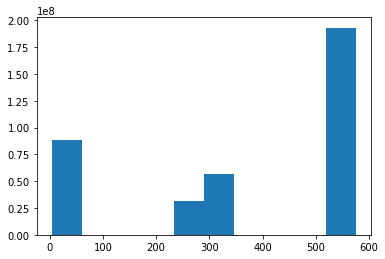

In [7]:
plt.hist(branch_list)